In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt
from collections import defaultdict
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec20_Updated.csv


# Experiment with  data

Task 1:import and cleaning 

In [4]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the CSV file into Python
data = pd.read_csv("../input/us-accidents/US_Accidents_Dec20_Updated.csv")
data = data.dropna()





# Checking the resulting data

1. Checking the current data format

In [3]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
10,A-11,2,2019-12-20 08:20:12,2019-12-20 10:05:05,28.021709,-82.203583,28.021709,-82.203583,0.000,Restrictions due to accident on US-92 at Bethl...,...,False,False,False,False,False,False,Day,Day,Day,Day
15,A-16,2,2019-04-11 16:35:14,2019-04-11 18:59:25,29.723339,-95.497337,29.723339,-95.497337,0.000,Accident on Westpark Dr at 14th St.,...,False,False,False,False,True,False,Day,Day,Day,Day
17,A-18,2,2020-11-21 16:32:00,2020-11-21 20:18:30,34.186595,-117.439427,34.185871,-117.439039,0.055,Incident on SIERRA AVE near LYTLE CREEK RD Exp...,...,False,False,False,False,False,False,Day,Day,Day,Day


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<AxesSubplot:title={'center':'Severity'}>,
        <AxesSubplot:title={'center':'Start_Lat'}>,
        <AxesSubplot:title={'center':'Start_Lng'}>,
        <AxesSubplot:title={'center':'End_Lat'}>],
       [<AxesSubplot:title={'center':'End_Lng'}>,
        <AxesSubplot:title={'center':'Distance(mi)'}>,
        <AxesSubplot:title={'center':'Number'}>,
        <AxesSubplot:title={'center':'Temperature(F)'}>],
       [<AxesSubplot:title={'center':'Wind_Chill(F)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Pressure(in)'}>,
        <AxesSubplot:title={'center':'Visibility(mi)'}>],
       [<AxesSubplot:title={'center':'Wind_Speed(mph)'}>,
        <AxesSubplot:title={'center':'Precipitation(in)'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

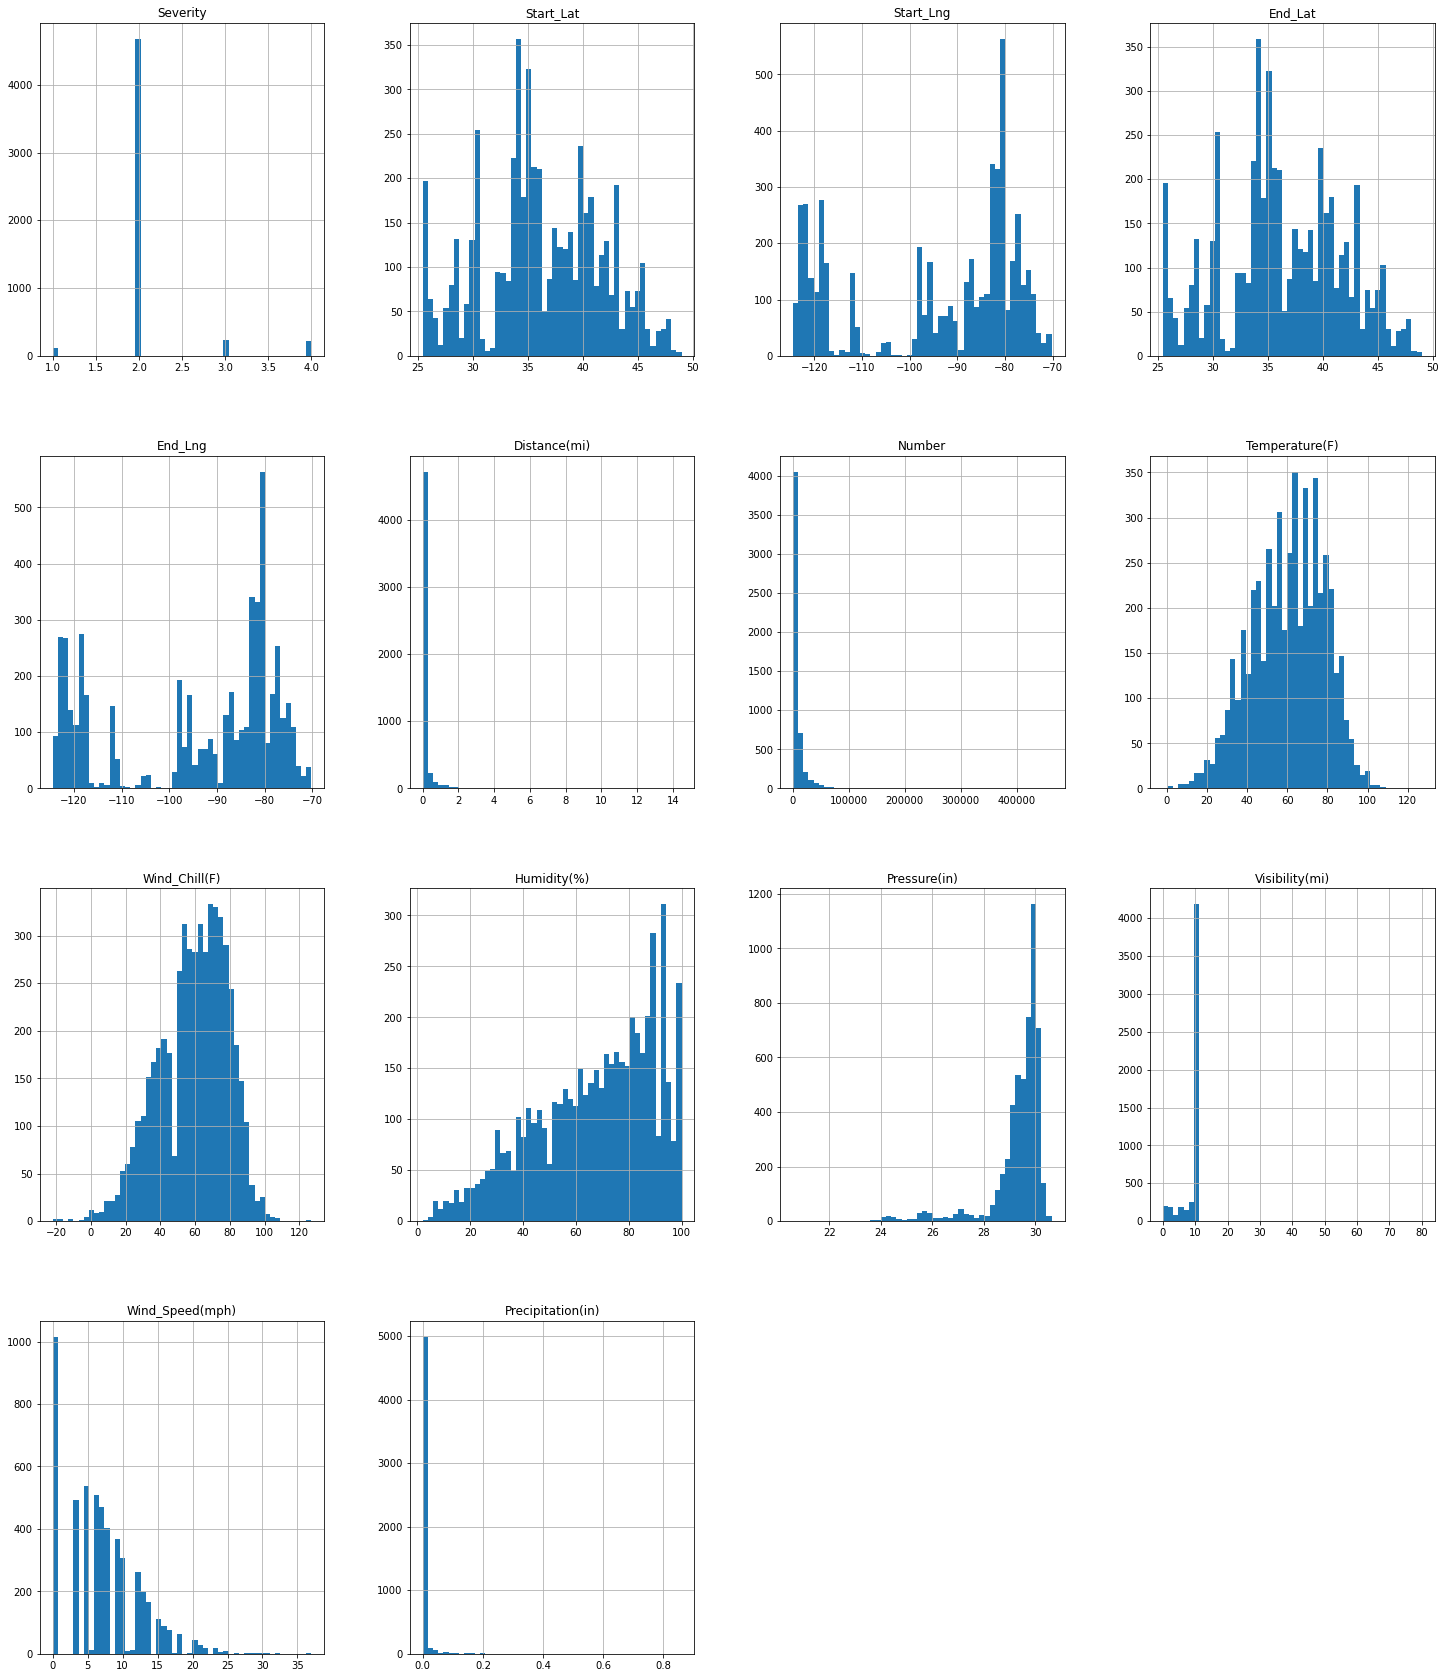

In [3]:
#generate sample data for fast computing
df_sample = data.sample(frac=0.01, replace=True, random_state=1)
fig = plt.figure(figsize = (25,30))
ax = fig.gca()
df_sample.hist(ax  =ax,bins = 50)

In [29]:
removed_invalid_data.dtypes

Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [5]:
### generate sample data for fast computing
df_sample = data.sample(frac=0.01, replace=True, random_state=1)
cleaned_data = df_sample.drop(['ID'],axis =1)
for x in cleaned_data.columns:
    try:
        cleaned_data[x] = cleaned_data[x].astype(float)
#         sns.displot(cleaned_data, x=x)
    except:
        if cleaned_data[x].dtypes== 'O' and '_Time' in x: # time object
            cleaned_data[x] = pd.to_datetime(cleaned_data[x] )# covert to datetime
            cleaned_data[x] =pd.to_numeric(cleaned_data[x],downcast='float')
#             sns.displot(cleaned_data, x=x)
        elif len(cleaned_data[x].unique())== 2:
            print('Binary type_______________',x,'\n',cleaned_data[x].unique())
            cleaned_data[x] = cleaned_data[x].map(dict(zip(cleaned_data[x].unique(),(0,1))))
        else:
            print(cleaned_data[x].iloc[:3])
cleaned_data.dtypes 
# cleaned_data.apply(pd.to_numeric)

#plot each feature with its hist
# for x in removed_invalid_data.columns:
#     removed_invalid_data
#     sns.histplot(data=removed_invalid_data[x], x=x)
# fig = plt.figure(figsize = (25,30))
# ax = fig.gca()

707978     Incident on MN-15 near CR-18 Drive with caution.
2724877                          At McKay Rd NE - Accident.
2609158                     At Balcom Canyon Rd - Accident.
Name: Description, dtype: object
707978               150th St
2724877     NE Saint Paul Hwy
2609158             Donlon Rd
Name: Street, dtype: object
Binary type_______________ Side 
 ['R' 'L']
707978     Hutchinson
2724877       Newberg
2609158         Somis
Name: City, dtype: object
707978      McLeod
2724877    Yamhill
2609158    Ventura
Name: County, dtype: object
707978     MN
2724877    OR
2609158    CA
Name: State, dtype: object
707978          55350
2724877    97132-7132
2609158         93066
Name: Zipcode, dtype: object
707978     US
2724877    US
2609158    US
Name: Country, dtype: object
707978     US/Central
2724877    US/Pacific
2609158    US/Pacific
Name: Timezone, dtype: object
707978     KHCD
2724877    KUAO
2609158    KCMA
Name: Airport_Code, dtype: object
707978     WSW
2724877    VAR
26091

Severity                 float64
Start_Time               float32
End_Time                 float32
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                       int64
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp        float32
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                  float64
Bump      

In [70]:
cleaned_data['Nautical_Twilight'].map(dict(zip(cleaned_data['Nautical_Twilight'].unique(),(0,1))))

{'Night': 0, 'Day': 1}

707978     Incident on MN-15 near CR-18 Drive with caution.
2724877                          At McKay Rd NE - Accident.
2609158                     At Balcom Canyon Rd - Accident.
Name: Description, dtype: object
707978               150th St
2724877     NE Saint Paul Hwy
2609158             Donlon Rd
Name: Street, dtype: object
Binary type_______________ Side 
 ['R' 'L']
707978     Hutchinson
2724877       Newberg
2609158         Somis
Name: City, dtype: object
707978      McLeod
2724877    Yamhill
2609158    Ventura
Name: County, dtype: object
707978     MN
2724877    OR
2609158    CA
Name: State, dtype: object
707978          55350
2724877    97132-7132
2609158         93066
Name: Zipcode, dtype: object
707978     US
2724877    US
2609158    US
Name: Country, dtype: object
707978     US/Central
2724877    US/Pacific
2609158    US/Pacific
Name: Timezone, dtype: object
707978     KHCD
2724877    KUAO
2609158    KCMA
Name: Airport_Code, dtype: object
707978     WSW
2724877    VAR
26091

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


Binary type_______________ Sunrise_Sunset 
 ['Night' 'Day']
Binary type_______________ Civil_Twilight 
 ['Night' 'Day']
Binary type_______________ Nautical_Twilight 
 ['Night' 'Day']
Binary type_______________ Astronomical_Twilight 
 ['Night' 'Day']


Severity                 float64
Start_Time               float32
End_Time                 float32
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp        float32
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                  float64
Bump      

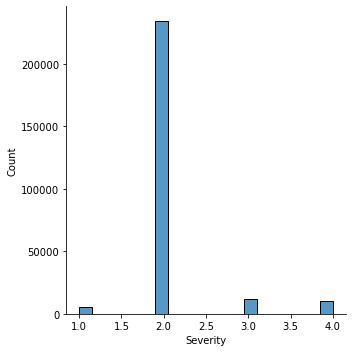

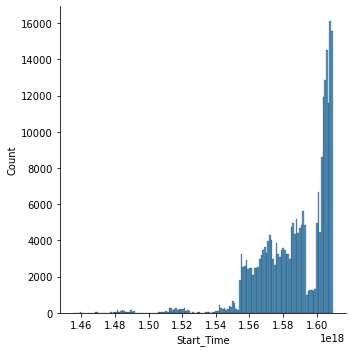

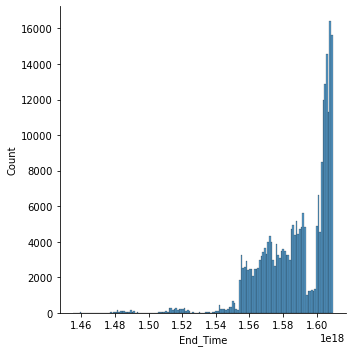

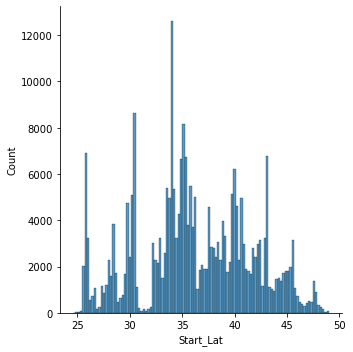

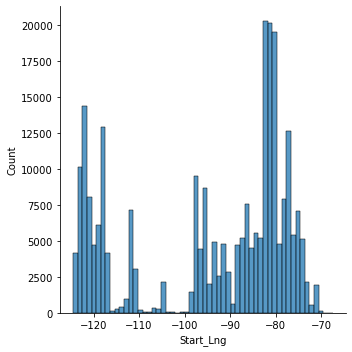

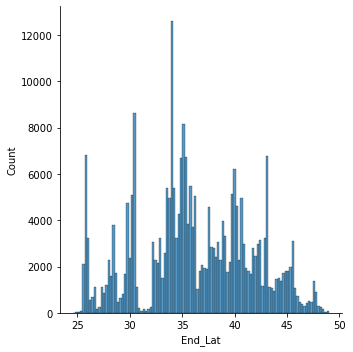

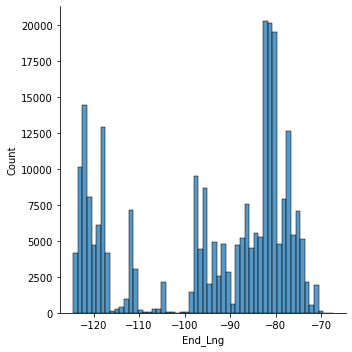

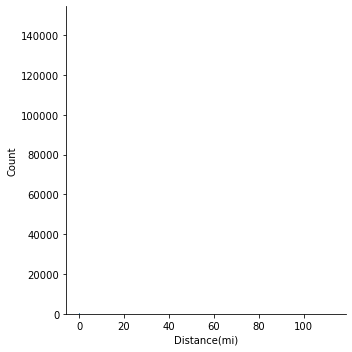

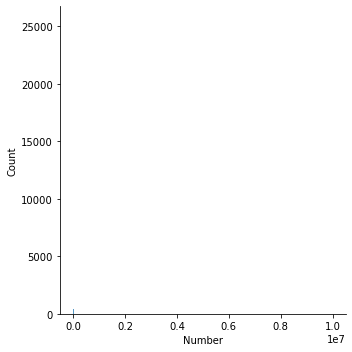

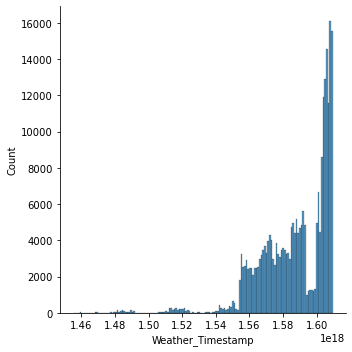

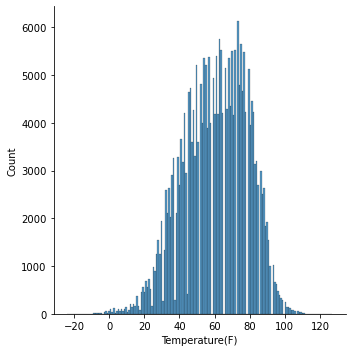

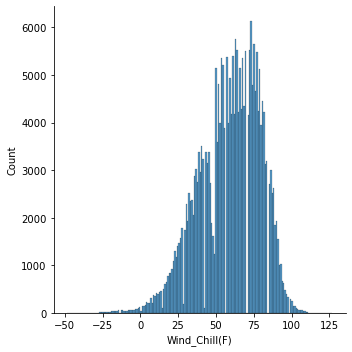

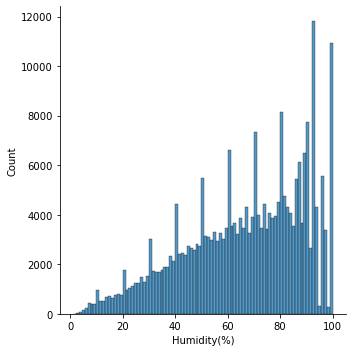

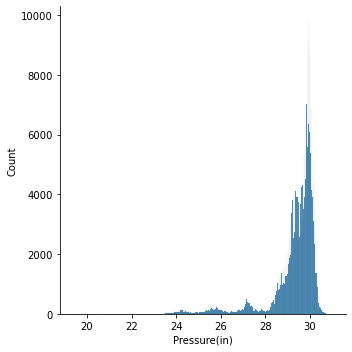

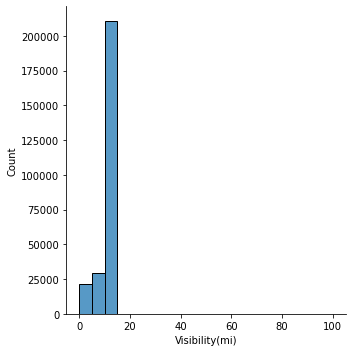

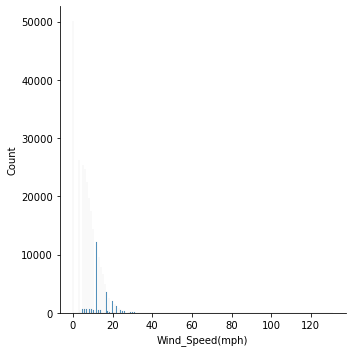

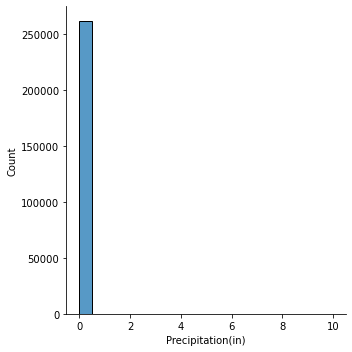

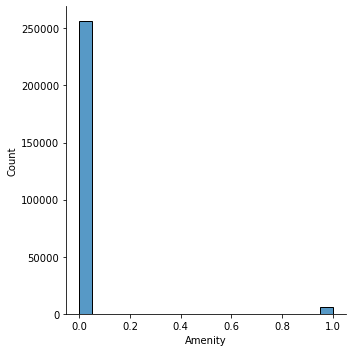

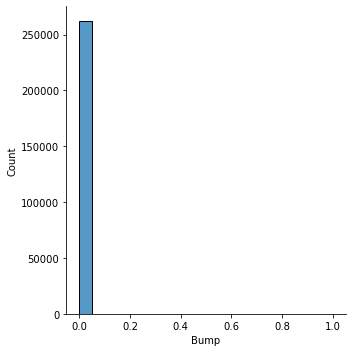

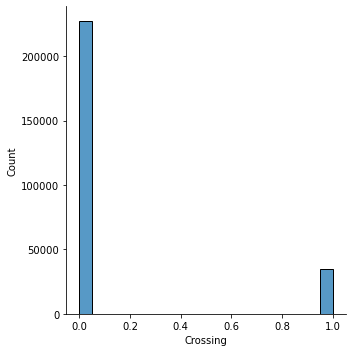

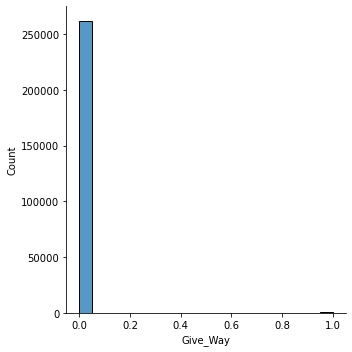

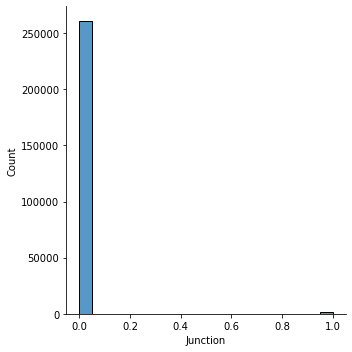

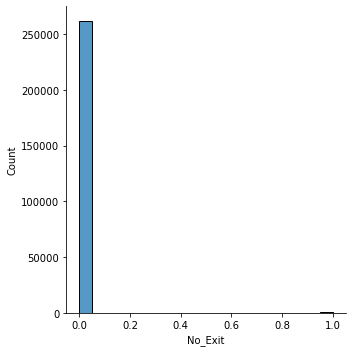

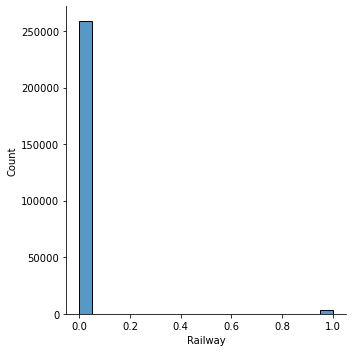

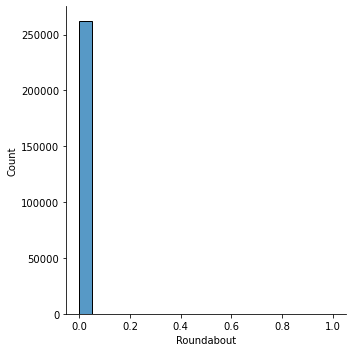

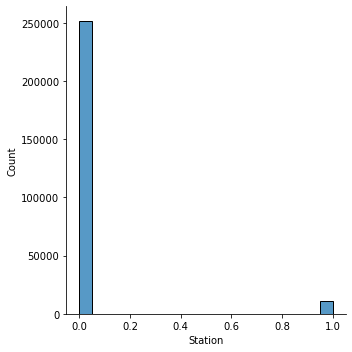

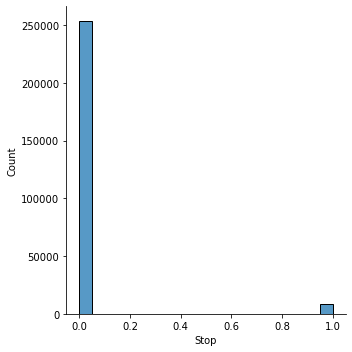

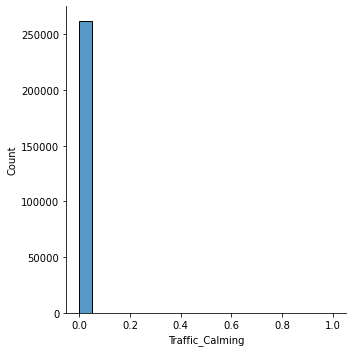

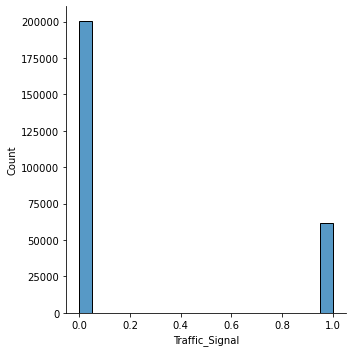

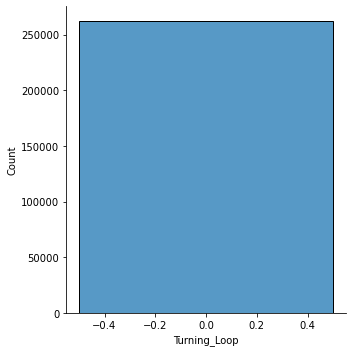

In [64]:
#generate sample data for fast computing
df_sample = data.sample(frac=0.5, replace=True, random_state=1)
cleaned_data = df_sample.drop(['ID'],axis =1)
for x in cleaned_data.columns:
    try:
        cleaned_data[x] = cleaned_data[x].astype(float)
        sns.displot(cleaned_data, x=x)
    except:
        if cleaned_data[x].dtypes== 'O' and '_Time' in x: # time object
            cleaned_data[x] = pd.to_datetime(cleaned_data[x] )# covert to datetime
            cleaned_data[x] =pd.to_numeric(cleaned_data[x],downcast='float')
            sns.displot(cleaned_data, x=x)
        elif len(cleaned_data[x].unique())== 2:
            print('Binary type_______________',x,'\n',cleaned_data[x].unique())
            cleaned_data[x].map(dict(zip(cleaned_data[x].unique(),(0,1))))
        else:
            print(cleaned_data[x].iloc[:3])
cleaned_data.dtypes 
# cleaned_data.apply(pd.to_numeric)

#plot each feature with its hist
# for x in removed_invalid_data.columns:
#     removed_invalid_data
#     sns.histplot(data=removed_invalid_data[x], x=x)
# fig = plt.figure(figsize = (25,30))
# ax = fig.gca()

In [6]:
for x in data:
    print(len(data[x].unique()),x)

524391 ID
4 Severity
416205 Start_Time
447022 End_Time
298837 Start_Lat
302533 Start_Lng
297125 End_Lat
300782 End_Lng
4301 Distance(mi)
314344 Description
34997 Number
97531 Street
2 Side
8463 City
1428 County
49 State
206547 Zipcode
1 Country
4 Timezone
1711 Airport_Code
135709 Weather_Timestamp
296 Temperature(F)
668 Wind_Chill(F)
100 Humidity(%)
904 Pressure(in)
52 Visibility(mi)
23 Wind_Direction
77 Wind_Speed(mph)
144 Precipitation(in)
84 Weather_Condition
2 Amenity
2 Bump
2 Crossing
2 Give_Way
2 Junction
2 No_Exit
2 Railway
2 Roundabout
2 Station
2 Stop
2 Traffic_Calming
2 Traffic_Signal
1 Turning_Loop
2 Sunrise_Sunset
2 Civil_Twilight
2 Nautical_Twilight
2 Astronomical_Twilight


The number of non-NA count

In [8]:
data.count()

ID                       524391
Severity                 524391
Start_Time               524391
End_Time                 524391
Start_Lat                524391
Start_Lng                524391
End_Lat                  524391
End_Lng                  524391
Distance(mi)             524391
Description              524391
Number                   524391
Street                   524391
Side                     524391
City                     524391
County                   524391
State                    524391
Zipcode                  524391
Country                  524391
Timezone                 524391
Airport_Code             524391
Weather_Timestamp        524391
Temperature(F)           524391
Wind_Chill(F)            524391
Humidity(%)              524391
Pressure(in)             524391
Visibility(mi)           524391
Wind_Direction           524391
Wind_Speed(mph)          524391
Precipitation(in)        524391
Weather_Condition        524391
Amenity                  524391
Bump    

The number of N/A

In [9]:
data.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

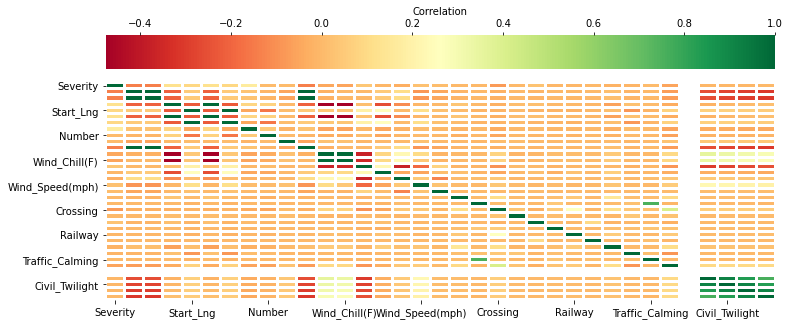

In [83]:
plt.figure(figsize=(12,5))
heatmap = sns.heatmap(cleaned_data.corr(), cmap="RdYlGn", cbar_kws = dict(use_gridspec=False, location="top", label='Correlation'), yticklabels=4, xticklabels=4, annot=False, linewidths=2)
plt.xticks(rotation=0) 
plt.show()

Feature selections
use mutual information and chi2 from sklearn

In [7]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif as ms
from sklearn.feature_selection import chi2
import plotly.graph_objects as go

In [8]:
cleaned_data['duration'] =   cleaned_data['End_Time'] - cleaned_data['Start_Time']
y =cleaned_data['duration']
x = cleaned_data.drop(['duration','Start_Time','End_Time','Description','Number','Street','Side',
                      'City','County','State','Zipcode','Country','Timezone','Airport_Code','Wind_Direction','Weather_Condition'],axis =1)
# # #examine the mutal information 
# mutual_info = ms(x, y)
# chi2_stat,pval = chi2(x,y)

For mutual information, higher value indicate positive correlation

In [ ]:

# fig = go.Figure(data=[go.Table(header=dict(values=['Features','Mutual Information'],fill_color='paleturquoise',align='left'),
#                  cells=dict(values=[x.columns,mutual_info],align='left'))
#                      ])
# fig.show()

For chi-square test, 
p value > 0.05 means likely independent
higher chi-square statistics means likely dependent

In [ ]:
# fig = go.Figure(data=[go.Table(header=dict(values=['Features','chi-squared statistics','p value'],fill_color='paleturquoise',align='left'),
#                  cells=dict(values=[x.columns,chi2_stat,pval],align='left'))
#                      ])
# fig.show()

Using Naive Bayes model. 
In this context, conditional independence is assumed between features.

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot  as plt
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SVMSMOTE 
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from numpy import where
from sklearn.metrics import classification_report

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

Prepare dataset

1. Remove features that are independent for promotion
2. Select categorical data for SMOTE-NC(Avoid producing meaningless sythnetic data points)

In [10]:
# # filter out independent feature to output
# dependentIndex = x.columns[pval<0.5]
# X = x.loc[:,dependentIndex]
# split dataset whille maintaining the class distrubution by strtify
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

Fixing imbalanced dataset

1. smote-nc(add miniority samples using knn)

In [ ]:
# Potential_categorical = []
# for i,col in enumerate(x):
#     if len(x[col].unique()) <35:
#         Potential_categorical.append(i)
# smotenc = SMOTENC(Potential_categorical,random_state = 101)
# X_oversample, y_oversample = smotenc.fit_resample(X_train, y_train)

Add smote using svm algorithm

In [ ]:
# sm = SVMSMOTE(random_state=42)
# X_oversample, y_oversample = sm.fit_resample(X_train, y_train)

The SVM (called SVC here) are commented as the runtime is toolong 

In [15]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
classifiers = [
    linear_model.Ridge(alpha=.5,normalize=True),
    linear_model.Lasso(alpha=0.1,normalize=True),
    linear_model.BayesianRidge(normalize=True),
    MLPRegressor(random_state=1, max_iter=1000),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls'),
    RandomForestRegressor(max_depth=2, random_state=0),
    tree.DecisionTreeRegressor(),
#     GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel(), random_state=0),
    KNeighborsRegressor(n_neighbors=5),
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)
    train_pred = pipe.predict(X_train)
    print(pipe)
    print(f"Train explained variance: {explained_variance_score(y_train, train_pred)} Train max error: {max_error(y_train, train_pred)/3600},r2: {r2_score(y_train, train_pred)}")
    y_pred=pipe.predict(X_test)
    print(f"Test explained variance: {explained_variance_score(y_test, y_pred)} Train max error: {max_error(y_test, y_pred)/3600},r2: {r2_score(y_train, train_pred)}")
#     target_names = ['Not Promoted', 'Promoted']
#     print('Train report*****************\n',classification_report(y_oversample, train_pred, target_names=target_names))
#     plot_confusion_matrix(pipe, X_test, y_test,normalize='true') #{'true', 'pred', 'all'}
#     y_pred=pipe.predict(X_test)
#     print('Test report*****************\n',classification_report(y_test, y_pred, target_names=target_names))
#     plt.show()

Pipeline(steps=[('classifier', Ridge(alpha=0.5, normalize=True))])
Train explained variance: 0.04599497488492976 Train max error: 214026436583.06796,r2: 0.045994968230730016
Test explained variance: 0.015590258536518298 Train max error: 1056408007533.6663,r2: 0.045994968230730016
Pipeline(steps=[('classifier', Lasso(alpha=0.1, normalize=True))])
Train explained variance: 0.05160537548986044 Train max error: 211337003914.25287,r2: 0.05160536887479317
Test explained variance: 0.0215701092688676 Train max error: 1053057513406.8834,r2: 0.05160536887479317


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0223742545153298e+30, tolerance: 2.1560103140250237e+26
  positive)


Pipeline(steps=[('classifier', BayesianRidge(normalize=True))])
Train explained variance: -3.3354174977517914e-08 Train max error: 219373474076.90497,r2: -4.032919043162053e-08
Test explained variance: 1.1283433354325467e-07 Train max error: 1064355795520.1761,r2: -4.032919043162053e-08
Pipeline(steps=[('classifier', MLPRegressor(max_iter=1000, random_state=1))])
Train explained variance: 0.0015368013700406413 Train max error: 218888721145.45178,r2: -0.003789934226115399
Test explained variance: 0.00010309591453205869 Train max error: 1063871150296.2649,r2: -0.003789934226115399
Pipeline(steps=[('classifier',
                 GradientBoostingRegressor(max_depth=1, random_state=0))])
Train explained variance: 0.1430318063275362 Train max error: 194643284311.61295,r2: 0.14303180035017005
Test explained variance: 0.014544298744795792 Train max error: 1057757515010.546,r2: 0.14303180035017005
Pipeline(steps=[('classifier',
                 RandomForestRegressor(max_depth=2, random_state=0)